Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

### Решение:

In [ ]:
import numpy


def linal():
    a11, a12, b1 = map(float, input().split())
    a21, a22, b2 = map(float, input().split())
    M = numpy.array([[a11, a12],
                     [a21, a22]])
    v = numpy.array([b1, b2])
    x, y = numpy.linalg.solve(M, v)
    print(x, y)
    return


linal()


1 5 11 
2 3 8
1.0 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



### Решение:

In [ ]:
import numpy


def decorate_matrix(n: int):
    M = numpy.ones((n, n))
    M[1:-1, 1:-1] = 0
    print(M)
    return


decorate_matrix(int(input()))


3
[[1. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

### Решение:

In [ ]:
def f(x: float):
    return (x + a) ** 2 - b


def g(x: float):
    return abs(f(x))


def find_min_func():
    f_x_min = -a
    f_y_min = f(f_x_min)

    if f_y_min >= 0:
        g_x_min = f_x_min
        return [f_x_min], [g_x_min]

    else:
        discriminant = 4 * a * a - 4 * (a * a - b)
        # discriminant > 0
        g_x1_min = (-2 * a + discriminant ** 0.5) / 2
        g_x2_min = (-2 * a - discriminant ** 0.5) / 2
        return [f_x_min], [g_x1_min, g_x2_min]


a, b = map(int, input().split())
f_answer, g_answer = find_min_func()
print(*f_answer)
print(*g_answer)

3 4
-3.0 -1.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

### Решение:

3 4


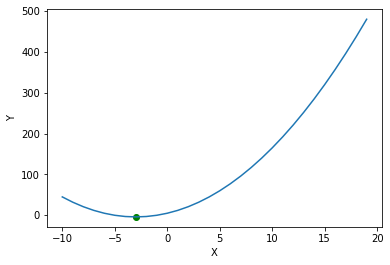

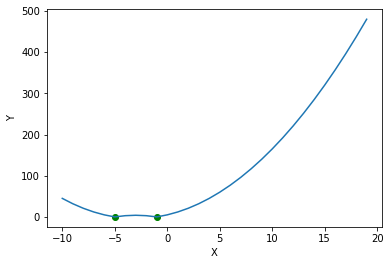

In [1]:
from matplotlib import pyplot


def f(x: float):
    return (x + a) ** 2 - b


def g(x: float):
    return abs(f(x))


def find_min_func():
    f_x_min = -a
    f_y_min = f(f_x_min)

    if f_y_min >= 0:
        g_x_min = f_x_min
        return [f_x_min], [g_x_min]

    else:
        discriminant = 4 * a * a - 4 * (a * a - b)
        # discriminant > 0
        g_x1_min = (-2 * a + discriminant ** 0.5) / 2
        g_x2_min = (-2 * a - discriminant ** 0.5) / 2
        return [f_x_min], [g_x1_min, g_x2_min]


def plot_func(func, min_list):
    x = [i for i in range(-10, 20, 1)]
    y = [func(i) for i in x]

    pyplot.plot(x, y)
    pyplot.ylabel("Y")
    pyplot.xlabel("X")

    for x in min_list:
        pyplot.scatter(x, func(x), color='green')
    pyplot.show()


a, b = map(int, input().split())
f_answer, g_answer = find_min_func()
plot_func(f, f_answer)
plot_func(g, g_answer)


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

### Решение

In [2]:
import numpy


def C(n, k):
    return numpy.math.factorial(n) / (numpy.math.factorial(n - k) * numpy.math.factorial(k))


def task_1():
    p = 2 / 2 ** 10
    q = 1 - p
    answer = 0
    for i in range(1, 1001):
        answer += C(1000, i) * p ** i * q ** (1000 - i)
    print(round(answer, 4))


def task_2():
    # Есть всего 5 случаев, когда из 10 бросков 8 подряд монета выпадет орлом и столько же решкой
    p = 5 * 2 / 2 ** 10
    q = 1 - p
    answer = 0
    for i in range(1, 1001):
        answer += C(1000, i) * p ** i * q ** (1000 - i)
    print(round(answer, 4))


def task_3():
    p = 2 / 2 ** 10
    q = 1 - p
    answer = C(1000, 3) * p ** 3 * q ** (1000 - 3)

    print(round(answer, 4))


task_1()
task_2()
task_3()


0.8584
0.9999
0.1763
